# KNN or K-Nearest Neighbours

KNN is a lazy learning algorithm which is used for classification. In this algorithm, the unknown or test set data will consider 'K' nearest neighbours from training set and predict the class based on count of its 'K' nearest neighbours i.e Among it's K nearest neighbours, which ever class has the highest count, it will be assigned to that particular class. Steps involved in this algorithm are:

1. Choose the number K of neighbours
2. Take the K nearest neighbours of the new data point, according to Euclidian Distance
3. Among the data points, count the number of datapoints in each category.
4. Assign the new data point to the category where you counted the most neighbours.

# Setup model

In [2]:
#imporing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.preprocessing import StandardScaler

In [3]:
#feature scaling
class FeatureScaling:
    def __init__(self,X,y):
        self.X=X.copy()
        if y.ndim==1:
            y=np.reshape(y,(y.shape[0],1))
        self.y=y.copy()
        self.minMax_X={}
        self.minMax_y={}
    
    def fit_transform_X(self):
        num_of_features=self.X.shape[1]
        for i in range(num_of_features):
            feature=self.X[:,i]
            Mean=np.mean(feature)
            Min=np.min(feature)
            Max=np.max(feature)
            feature=(feature-Mean)/(Max-Min)
            self.minMax_X[i]=np.array([Mean,Min,Max])
            self.X[:,i]=feature
        return self.X.copy()
    
    def fit_transform_Y(self):
        num_of_features=self.y.shape[1]
        for i in range(num_of_features):
            feature=self.y[:,i]
            Mean=np.mean(feature)
            Min=np.min(feature)
            Max=np.max(feature)
            feature=(feature-Mean)/(Max-Min)
            self.minMax_y[i]=np.array([Mean,Min,Max])
            self.y[:,i]=feature
        return np.reshape(self.y,self.y.shape[0])
    
    def inverse_transform_X(self,X):
        X_transformed=X.copy()
        num_of_features=X_transformed.shape[1]
        for i in range(num_of_features):
            feature=X_transformed[:,i]
            Mean=self.minMax_X[i][0]
            Min=self.minMax_X[i][1]
            Max=self.minMax_X[i][2]
            feature=feature*(Max-Min)+Mean
            X_transformed[:,i]=feature
        return X_transformed
    
    def inverse_transform_Y(self,y):
        y_transformed=y.copy()
        if y_transformed.ndim==1:
            y_transformed=np.reshape(y_transformed,(y_transformed.shape[0],1))
        num_of_features=y_transformed.shape[1]
        for i in range(num_of_features):
            feature=y_transformed[:,i]
            Mean=self.minMax_y[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=feature*(Max-Min)+Mean
            y_transformed[:,i]=feature
        return np.reshape(y_transformed,y_transformed.shape[0])
    
    def transform_X(self,X):
        X_transformed=X.copy()
        num_of_features=X_transformed.shape[1]
        for i in range(num_of_features):
            feature=X_transformed[:,i]
            Mean=self.minMax_X[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=(feature-Mean)/(Max-Min)
            X_transformed[:,i]=feature
        return X_transformed
    
    def transform_Y(self,y):
        y_transformed=y.copy()
        if y_transformed.ndim==1:
            y_transformed=np.reshape(y_transformed,(y_transformed.shape[0],1))
        num_of_features=y_transformed.shape[1]
        for i in range(num_of_features):
            feature=y_transformed[:,i]
            Mean=self.minMax_y[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=(feature-Mean)/(Max-Min)
            y_transformed[:,i]=feature
        return np.reshape(y_transformed,y_transformed.shape[0])
    
    def returnX(self):
        return self.X
    
    def returnY(self):
        return self.y

In [4]:
class LDA:

    def __init__(self, n_components): # number of dimensions after reduction
        self.n_components = n_components
        self.linear_discriminants = None

    def transform(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Within class scatter matrix:
        # SW = sum((X_c - mean_X_c)^2 )

        # Between class scatter:
        # SB = sum( n_c * (mean_X_c - mean_overall)^2 )

        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            # (4, n_c) * (n_c, 4) = (4,4) -> transpose
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            # (4, 1) * (1, 4) = (4,4) -> reshape
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determine SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvalues high to low
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.linear_discriminants = eigenvectors[0:self.n_components]

        return np.dot(X, self.linear_discriminants.T).astype(np.float64)

In [5]:
# class LDA:
#     def __init__(self, X, y):
#         self.X, self.y = X, y
#         self.class_dict = {}
#         self.mean_dict = {}

#     def reduce_dimension(self):
#         for i in range(self.y.shape[0]):
#             if self.y[i] not in self.class_dict:
#                 self.class_dict[self.y[i]]=self.X[i].reshape(1,self.X[i].shape[0])
#             else:
#                 self.class_dict[self.y[i]]=np.append(self.class_dict[self.y[i]],self.X[i].reshape(1,self.X[i].shape[0]),axis=0)

#         for each in self.class_dict:
#             self.mean_dict[each]=np.mean(self.class_dict[each],axis=0)

#         #compute With in class scatter matrix
#         n=len(self.class_dict)
#         Sw=np.array([])
#         for i in self.class_dict:
#             x=self.class_dict[i]
#             m=self.mean_dict[i]
#             temp=np.dot((x-m).T,(x-m))
#             if Sw.shape[0]==0:
#                 Sw=np.cov((x-m).T)
#                 #Sw=temp
#             else:
#                 #SW=Sw+temp
#                 SW=Sw+np.cov((x-m).T)


#         #computer between class Scatter matrix
#         Sb=np.array([])
#         Mean=np.mean(self.X,axis=0)
#         Mean=Mean.reshape(Mean.shape[0],1)

#         for i in self.mean_dict:
#             m=self.mean_dict[i].reshape(self.mean_dict[i].shape[0],1)
#             n=len(self.class_dict[i])
#             temp=np.multiply(n,np.dot((m-Mean),(m-Mean).T))
#             if Sb.shape[0]==0:
#                 Sb=temp
#             else:
#                 Sb=Sb+temp
                

#         #Sb=n*np.dot((MeanMatrix-MeanOfMeans).T,(MeanMatrix-MeanOfMeans))
#         #Sb=n*np.cov(MeanMatrix.T)    
#         #computee sw^-1Sb
#         eig_vals,eig_vecs=np.linalg.eigh(np.matmul(np.linalg.pinv(Sw),Sb))
#         eig_pairs=[(np.abs(eig_vals[i]),eig_vecs[i]) for i in range(len(eig_vals))]
#         eig_pairs=sorted(eig_pairs,key=lambda k:k[0],reverse=True)
#         W=np.hstack((eig_pairs[0][1].reshape(13,1),eig_pairs[1][1].reshape(13,1)))

#         X_new=np.dot(self.X,W)

#         return X_new

In [6]:
class KNN:
    def __init__(self,X_train,Y_train,K):
        self.X_train=X_train
        self.Y_train=Y_train
        self.K=K
        
    def predict(self,X):
        y_pred=np.array([])
        for each in X:
            ed=np.sum((each-self.X_train)**2,axis=1)
            y_ed=np.concatenate((self.Y_train.reshape(self.Y_train.shape[0],1),ed.reshape(ed.shape[0],1)),axis=1)
            y_ed=y_ed[y_ed[:,1].argsort()]
            K_neighbours=y_ed[0:self.K]
            (values,counts) = np.unique(K_neighbours[:,0].astype(int),return_counts=True)
            y_pred=np.append(y_pred,values[np.argmax(counts)])
        return y_pred
            

# Preprocess data

In [16]:
#reading dataset
# Data=pd.read_csv('Social_Network_Ads.csv')
Data=pd.read_csv('Wine.csv')
Data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [17]:
#Getting features from dataset
Data=Data.sample(frac=1)
# X=Data.iloc[:,[2, 3]].values
# y=Data.iloc[:,4].values
X=Data.iloc[:,:-1].values
y=Data.iloc[:,-1].values
X=X.astype(float)
print(X)

[[1.225e+01 1.730e+00 2.120e+00 ... 1.000e+00 3.170e+00 5.100e+02]
 [1.229e+01 3.170e+00 2.210e+00 ... 1.420e+00 2.830e+00 4.060e+02]
 [1.349e+01 3.590e+00 2.190e+00 ... 8.100e-01 1.820e+00 5.800e+02]
 ...
 [1.305e+01 1.730e+00 2.040e+00 ... 1.120e+00 2.910e+00 1.150e+03]
 [1.422e+01 3.990e+00 2.510e+00 ... 8.900e-01 3.530e+00 7.600e+02]
 [1.260e+01 1.340e+00 1.900e+00 ... 1.040e+00 2.770e+00 5.620e+02]]


In [18]:
#feature scaling
fs=FeatureScaling(X,y)
X=fs.fit_transform_X()
# ss=StandardScaler()
# X=ss.fit_transform(X)
print(X)

[[-0.19753105 -0.11983168 -0.13182719 ...  0.03459395  0.20451084
  -0.16896809]
 [-0.18700473  0.1647533  -0.08369885 ...  0.37605737  0.07996872
  -0.24314783]
 [ 0.12878474  0.24775725 -0.09439404 ... -0.11987759 -0.28999465
  -0.11903941]
 ...
 [ 0.01299527 -0.11983168 -0.17460794 ...  0.13215493  0.10927275
   0.28752264]
 [ 0.32089001  0.32680863  0.07672896 ... -0.05483694  0.33637898
   0.0093486 ]
 [-0.10542578 -0.19690678 -0.24947425 ...  0.06711428  0.0579907
  -0.13187822]]


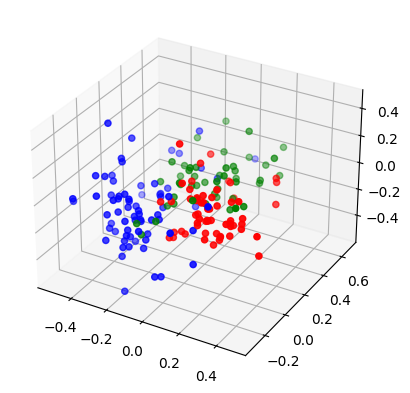

In [19]:
clr=['red','blue','green']
colors = [clr[int(y[i]) - 1] for i in range(X.shape[0])] # create color array based on labels

ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors)

plt.show()

In [20]:
lda=LDA(2)
X=lda.transform(X,y)
print(X)

[[-0.07081494  0.28342963]
 [-0.14882715  0.44442764]
 [ 0.32251239 -0.10498782]
 [ 0.44242331 -0.12511711]
 [-0.09620528  0.34384575]
 [-0.28495464 -0.22659242]
 [-0.23467715 -0.32974668]
 [ 0.45734111 -0.26102677]
 [-0.31077323 -0.16380377]
 [ 0.10632209  0.38047903]
 [-0.19781232 -0.1158081 ]
 [ 0.48824154 -0.08739466]
 [-0.05642984  0.1944984 ]
 [-0.41052407 -0.3682902 ]
 [ 0.00305858  0.15867548]
 [-0.42701836 -0.22684907]
 [-0.30585868 -0.19240629]
 [ 0.05823517  0.16566202]
 [ 0.07265042  0.15978785]
 [-0.09786292  0.2093767 ]
 [ 0.44241193 -0.20727084]
 [ 0.27655846 -0.11247027]
 [ 0.42762943 -0.20835447]
 [-0.49979581 -0.41412806]
 [-0.2722117  -0.15177984]
 [-0.06546767  0.37213314]
 [ 0.28864296 -0.12148049]
 [-0.04718173  0.32892457]
 [-0.00830178  0.4148993 ]
 [-0.3075339  -0.02306549]
 [-0.39083398 -0.13415286]
 [-0.16374899 -0.15245181]
 [ 0.02746362  0.32039517]
 [ 0.12690782  0.29122942]
 [ 0.00503846  0.3987026 ]
 [-0.31144161 -0.24931129]
 [ 0.4107159   0.00077188]
 

C:\Users\phanh\AppData\Local\Temp\ipykernel_25132\744708936.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.dot(X, self.linear_discriminants.T).astype(np.float64)


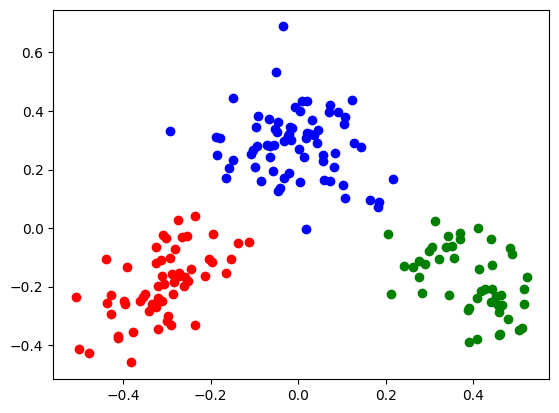

In [21]:
clr=['red','blue','green']
for i in range(X.shape[0]):
    plt.scatter(X[i,0],X[i,1],c=clr[y[i]-1])
plt.show()

In [22]:
#training and testing set size
train_size=int(0.75*Data.shape[0])
test_size=int(0.25*Data.shape[0])
print("Training set size : "+ str(train_size))
print("Testing set size : "+str(test_size))

Training set size : 133
Testing set size : 44


In [23]:
#training set split
X_train=X[0:train_size,:]
Y_train=y[0:train_size]
print(X_train,Y_train)

[[-0.07081494  0.28342963]
 [-0.14882715  0.44442764]
 [ 0.32251239 -0.10498782]
 [ 0.44242331 -0.12511711]
 [-0.09620528  0.34384575]
 [-0.28495464 -0.22659242]
 [-0.23467715 -0.32974668]
 [ 0.45734111 -0.26102677]
 [-0.31077323 -0.16380377]
 [ 0.10632209  0.38047903]
 [-0.19781232 -0.1158081 ]
 [ 0.48824154 -0.08739466]
 [-0.05642984  0.1944984 ]
 [-0.41052407 -0.3682902 ]
 [ 0.00305858  0.15867548]
 [-0.42701836 -0.22684907]
 [-0.30585868 -0.19240629]
 [ 0.05823517  0.16566202]
 [ 0.07265042  0.15978785]
 [-0.09786292  0.2093767 ]
 [ 0.44241193 -0.20727084]
 [ 0.27655846 -0.11247027]
 [ 0.42762943 -0.20835447]
 [-0.49979581 -0.41412806]
 [-0.2722117  -0.15177984]
 [-0.06546767  0.37213314]
 [ 0.28864296 -0.12148049]
 [-0.04718173  0.32892457]
 [-0.00830178  0.4148993 ]
 [-0.3075339  -0.02306549]
 [-0.39083398 -0.13415286]
 [-0.16374899 -0.15245181]
 [ 0.02746362  0.32039517]
 [ 0.12690782  0.29122942]
 [ 0.00503846  0.3987026 ]
 [-0.31144161 -0.24931129]
 [ 0.4107159   0.00077188]
 

In [24]:
#testing set split
X_test=X[train_size:,:]
Y_test=y[train_size:]
print(X_test, Y_test)

[[ 0.07202128  0.41969026]
 [-0.1776571   0.30874147]
 [ 0.18486456  0.09058657]
 [-0.26534227 -0.02925489]
 [ 0.38988455 -0.38860024]
 [-0.36180464 -0.24931672]
 [-0.10708545  0.25275939]
 [-0.2345789   0.0401505 ]
 [-0.31984976 -0.23858791]
 [-0.39639031 -0.26039734]
 [-0.32370805 -0.11899591]
 [ 0.44064316 -0.25310209]
 [ 0.46607644 -0.26267783]
 [-0.35075727 -0.22389694]
 [ 0.30515522 -0.06289087]
 [-0.0199461   0.32066097]
 [ 0.10381842  0.35409008]
 [ 0.03183626  0.37014927]
 [ 0.02096558  0.32585072]
 [-0.0939144   0.27983786]
 [ 0.50995751 -0.34207151]
 [-0.28826928 -0.15793463]
 [-0.29884009 -0.31702121]
 [-0.32047767 -0.1966798 ]
 [-0.50769359 -0.23552001]
 [-0.14773562  0.23158942]
 [-0.04602917  0.12554037]
 [ 0.21121911 -0.22333538]
 [ 0.33758491 -0.06477198]
 [-0.03155485  0.29719839]
 [ 0.36997534 -0.01653481]
 [ 0.41779232 -0.21459663]
 [-0.42697127 -0.29351385]
 [ 0.10204281  0.1476133 ]
 [ 0.45856396 -0.36635241]
 [ 0.06959019  0.39502838]
 [-0.08381537  0.15917567]
 

# Training

In [25]:
l=time.time()
knn=KNN(X_train,Y_train,5)
y_pred=knn.predict(X_test)
r=time.time()
KNN_learn_time=(r-l)
print(r-l)

0.0029897689819335938


In [26]:
#getting the confusion matrix
true_predict_1=len([i for i in range(0,Y_test.shape[0]) if Y_test[i]==1 and y_pred[i]==1])
true_predict_2=len([i for i in range(0,Y_test.shape[0]) if Y_test[i]==2 and y_pred[i]==2])
true_predict_3=len([i for i in range(0,Y_test.shape[0]) if Y_test[i]==3 and y_pred[i]==3])
confusion_matrix=np.diag([true_predict_1, true_predict_2, true_predict_3])
print(confusion_matrix)

[[17  0  0]
 [ 0 18  0]
 [ 0  0 10]]


In [27]:
#Same algorithm using sklearn KNN just for comparsion purpose
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
l=time.time()
classifier.fit(X_train, Y_train)
y_pred_sklearn = classifier.predict(X_test)
r=time.time()
sklearn_time=(r-l)
print(sklearn_time)

0.007928848266601562


In [28]:
print("But sklearn time is faster than our implementation by: "+str(KNN_learn_time/sklearn_time)+" times")

But sklearn time is faster than our implementation by: 0.3770748135674765 times


In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred_sklearn)
print(cm)

[[17  0  0]
 [ 0 18  0]
 [ 0  0 10]]


# Visualization

C:\Users\phanh\AppData\Local\Temp\ipykernel_25132\2832704107.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


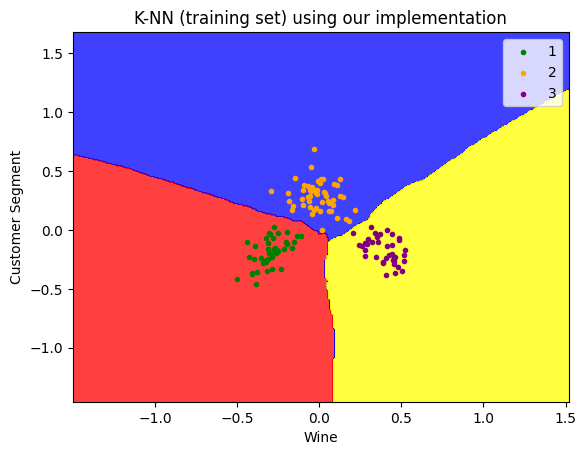

Time required for plotting is: 5.186985015869141 seconds


In [30]:
# Visualising the Training set results for our implementation
l=time.time()
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('green', 'orange', 'purple'))(i), label = j,marker='.')
plt.title('K-NN (training set) using our implementation')
plt.xlabel('Wine')
plt.ylabel('Customer Segment')
plt.legend()
plt.show()
r=time.time()
print("Time required for plotting is: "+str(r-l)+" seconds")

In [174]:
# Visualising the Test set results for our implementation
l=time.time()
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('green', 'orange', 'purple'))(i), label = j,marker='.')
plt.title('K-NN (test set) using our implementation')
plt.xlabel('Wine')
plt.ylabel('Customer Segment')
plt.legend()
plt.show()
r=time.time()
print("Time required for plotting is: "+str(r-l)+" seconds")

C:\Users\phanh\AppData\Local\Temp\ipykernel_7736\2872821319.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


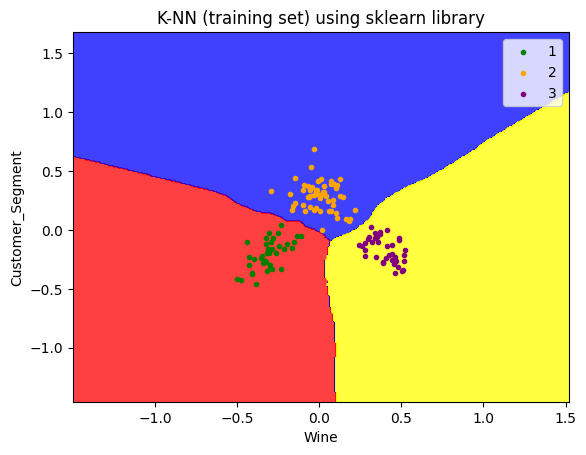

Time required for plotting is: 2.195542097091675 seconds


In [ ]:
# Visualising the Training set results for sklearn class
l=time.time()
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('green', 'orange', 'purple'))(i), label = j,marker='.')
plt.title('K-NN (training set) using sklearn library')
plt.xlabel('Wine')
plt.ylabel('Customer Segment')
plt.legend()
plt.show()
r=time.time()
print("Time required for plotting is: "+str(r-l)+" seconds")

C:\Users\phanh\AppData\Local\Temp\ipykernel_7736\3047613493.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


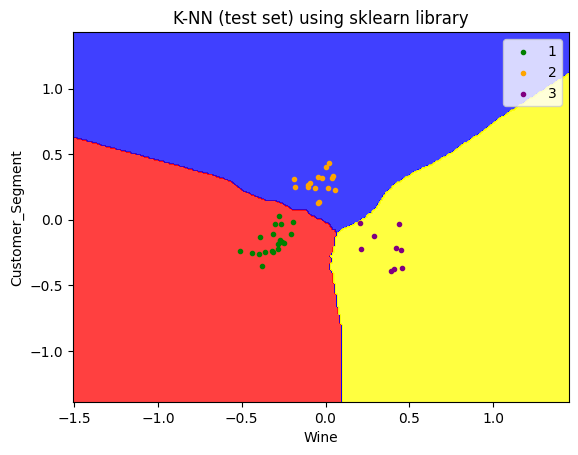

Time required for plotting is: 1.190871000289917 seconds


In [ ]:
# Visualising the Test set results for sklearn class
l=time.time()
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('green', 'orange', 'purple'))(i), label = j,marker='.')
plt.title('K-NN (test set) using sklearn library')
plt.xlabel('Wine')
plt.ylabel('Customer Segment')
plt.legend()
plt.show()
r=time.time()
print("Time required for plotting is: "+str(r-l)+" seconds")

Conclusion is our implementation is slower but still we have achieved similar results compared to sklearn package